<a href="https://colab.research.google.com/github/Structsagar/Bridge-AxiaForce/blob/main/Bridge_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import matplotlib
import math
from matplotlib.lines import Line2D
matplotlib.rcParams['animation.embed_limit'] = 100 * 1024 * 1024

**Initialisation**

In [ ]:
# Define the axial forces for each bay
span = 50
bays = 8
Br_height =10
bay_width = round(span / bays, 2)
angle =np.arctan(Br_height / bay_width)  # Angle in radians
loads = [[80, 0],
         [120, 3.96],
         [120, 5.48],         #[load,Position] loads in KN
         [170, 7.61],
         [170,8.98],
         [170,12.03],
         [170,13.4]
         ]         #Position =cumulative distance in m


[[ 80.   120.   120.   170.   170.   170.   170.  ]
 [  0.     3.96   5.48   7.61   8.98  12.03  13.4 ]]


**Ordinate Calculation of a Truss**

In [ ]:
bot_ord=[]
for j in range(bays):
  if j==0 or (j>=bays/2 and j<bays-1):
    bot_ord.append(round(((j+1)*bay_width*(span-(j+1)*bay_width))/(span*Br_height),3))
  else:
    bot_ord.append(round((j*bay_width*(span-j*bay_width))/(span*Br_height),3))
print(bot_ord)

upp_ord=[]
for j in range(bays):
  if j==0:
    upp_ord.append(round(-((span-(j+1)*bay_width)/span)*(1/(math.sin(math.atan(Br_height/bay_width)))),3))
  elif j==bays-1:
    upp_ord.append(round(-(j*bay_width/span)*(1/(math.sin(math.atan(Br_height/bay_width)))),3))
  elif j>0 and j<bays/2:
    upp_ord.append(round(-((j+1)*bay_width*(span-(j+1)*bay_width))/(span*Br_height),3))
  else:
    upp_ord.append(round(-(j*bay_width*(span-j*bay_width))/(span*Br_height),3))
print(upp_ord)

diag_ord=[[] for i in range(bays-2)]
for i in range(bays-2):
  if i<(bays-2)/2:
    diag_ord[i].append(round(-(((i+1)*bay_width)/span*(1/(math.sin(math.atan(Br_height/bay_width))))),3))
  else:
     diag_ord[i].append(round((((i+1)*bay_width)/span*(1/(math.sin(math.atan(Br_height/bay_width))))),3))
  for j in range(bays):
    if j==i+1 and j<bays/2:
      diag_ord[i].append(round(((span-(j+1)*bay_width)/span*(1/(math.sin(math.atan(Br_height/bay_width))))),3))
    elif j==i+1 and j>=bays/2:
      diag_ord[i].append(round(-((span-(j+1)*bay_width)/span*(1/(math.sin(math.atan(Br_height/bay_width))))),3))
    else:
      pass
print(diag_ord)

vert_ord=[[] for i in range(bays-1)]
for i in range(bays-1):
  if i==0:
    vert_ord[i].append(1)
  elif i==bays-2:
    vert_ord[i].append(0)
  elif i>0 and i<math.floor((bays-1)/2):
    vert_ord[i].append(round(((i+1)*bay_width)/span,3))
  elif i==math.floor((bays-1)/2):
    vert_ord[i].append(0)
  else:
    vert_ord[i].append(round((-(i*bay_width)/span),3))
  for j in range(bays):
    if j==i+1 and j==bays-1:
      vert_ord[i].append(1)
    elif j==i+1 and j==1:
      vert_ord[i].append(0)
    elif j==i+1 and j<(bays/2):
      vert_ord[i].append(round((-(span-(j+1)*bay_width)/span),3))
    elif j==i+1 and j==bays/2:
      vert_ord[i].append(0)
    elif j==i+1 and j>bays/2:
      vert_ord[i].append(round(((span-j*bay_width)/span),3))
    else:
      pass
print(vert_ord)

[0.547, 0.547, 0.938, 1.172, 1.172, 0.938, 0.547, 0.547]
[-1.032, -0.938, -1.172, -1.25, -1.25, -1.172, -0.938, -1.032]
[[-0.147, 0.884], [-0.295, 0.737], [-0.442, 0.59], [0.59, -0.442], [0.737, -0.295], [0.884, -0.147]]
[[1, 0], [0.25, -0.625], [0.375, -0.5], [0, 0], [-0.5, 0.375], [-0.625, 0.25], [0, 1]]


**Section Calculation**






In [ ]:
bot_sec = [((sec+1)*bay_width) if sec == 0 or (sec >= bays/2 and sec < bays-1) else (sec*bay_width) for sec in range(bays)]
print(bot_sec)

upp_sec = [((sec+1)*bay_width) if sec < bays/2 else (sec*bay_width) for sec in range(bays)]
print(upp_sec)

diag_sec=[[] for i in range(bays-2)]
for i in range(bays-2):
  diag_sec[i].append((i+1)*bay_width)
  for j in range(bays-1):
    if j==i+1:
      diag_sec[i].append((j+1)*bay_width)
print(diag_sec)

vert_sec=[[] for i in range(bays-1)]
for i in range(bays-1):
  if i ==bays/2-1:
    vert_sec[i].append(i*bay_width)
  elif i<bays/2-1:
    vert_sec[i].append((i+1)*bay_width)
  else:
    vert_sec[i].append((i)*bay_width)
  for j in range(bays):
   # if j==i+1 and j==1:
   #   vert_sec[i].append(0)
    if j==i+1 and j<=bays/2:
      vert_sec[i].append((j+1)*bay_width)
    #elif j==i+1 and j==bays/2:
      #vert_sec[i].append(0)
    elif j==i+1 and j>bays/2:
      vert_sec[i].append(j*bay_width)
print(vert_sec)

[6.25, 6.25, 12.5, 18.75, 31.25, 37.5, 43.75, 43.75]
[6.25, 12.5, 18.75, 25.0, 25.0, 31.25, 37.5, 43.75]
[[6.25, 12.5], [12.5, 18.75], [18.75, 25.0], [25.0, 31.25], [31.25, 37.5], [37.5, 43.75]]
[[6.25, 12.5], [12.5, 18.75], [18.75, 25.0], [18.75, 31.25], [25.0, 31.25], [31.25, 37.5], [37.5, 43.75]]


**Truss Plotting Logic**

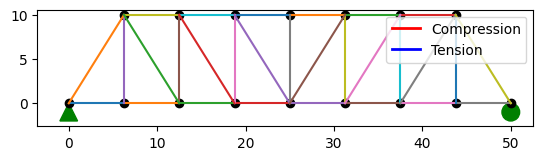

In [ ]:
# Initializing the figure and bar collection
fig, ax = plt.subplots()

legend_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='blue', lw=2)]
legend_labels = ['Compression', 'Tension']

# Add the legend to your axes
ax.legend(legend_lines, legend_labels, loc='upper right')


#setting the nodes for lower chords
lower_nodes=np.zeros(bays+1)
bay=0
for node in lower_nodes:
  ax.plot(node+bay,0,"ko")
  bay+=bay_width


#setting the nodes for upper chords
upper_nodes=np.zeros(bays-1)
bay=bay_width
for node in upper_nodes:
  ax.plot(node+bay,Br_height,"ko")
  bay+=bay_width

#Adding bottom chords
for i in range(bays):
  ax.plot([i*bay_width,(i+1)*bay_width],[0,0])

#Adding Top chords
for i in range(bays-2):
  ax.plot([(i+1)*bay_width,(i+2)*bay_width],[Br_height,Br_height])

  #Adding vertical chords
for i in range(1,bays):
  ax.plot([i*bay_width,i*bay_width],[0,Br_height])

#Adding diagonal chords
for i in range(bays):
  if i==0 or (i>=bays/2 and i<bays-1):
    ax.plot([i*bay_width,(i+1)*bay_width],[0,Br_height])
  else:
    ax.plot([i*bay_width,(i+1)*bay_width],[Br_height,0])
#creatin supports
colored_circle=plt.Circle((bays*bay_width,-1),1,color='green')
ax.add_artist(colored_circle)

vertices=[[-1,-2],[0,0],[1,-2]]
triangle=plt.Polygon(vertices,closed=True,color='green')
ax.add_patch(triangle)
ax.set_aspect('equal')
ax.axis('on')
plt.show()

**Top Chord Calculation**

In [ ]:

# Function to generate axial forces at each increment
def barlist():
    y_val = [[] for _ in range(bays)]
    axial_force = [[] for _ in range(bays)]
    for i in np.arange(0, span+ loads[-1][1] + 0.1, 0.1):#
        for j in range(bays):
            x = np.array([0, upp_sec[j], span])
            y = np.array([0, upp_ord[j], 0])
            y_val[j].append(np.interp(i, x, y))
            load_val = []
            position = []
            for load, pos in loads:
                if pos <= i:
                    load_val.append(load)
                    if pos==0:
                      position.append(y_val[j][int(i*10)])
                    else:
                      position.append(y_val[j][int((i-pos)*10)])
            axial_force[j].append(sum(np.array(load_val)*np.array(position)))
    return axial_force
y_vals = barlist()

# Maximum y value for setting the y-axis limits
max_y_lim = min(min(max_val) for max_val in y_vals)  # Top chord consist of negative value

#ax.set_aspect('equal', adjustable='box')
#plt.axis("off")
ax.set_aspect('equal')
x = np.arange(2, bays) * bay_width - bay_width / 2  # Centering the bays
barcollection = ax.bar(x, [0] * (bays - 2), width=bay_width, bottom=Br_height)  # Initializing bars with zero heights w.r.t top chord

# Set the y-axis limits with a buffer
buffer = max_y_lim * 0.1  # 10% increased
scaling_fac = (Br_height / 4) / abs(max_y_lim)
ax.set_ylim((max_y_lim + buffer) * scaling_fac,Br_height+8)
ax.set_xlim(-2,span+1)

ax.axis('off')
bar_texts = [ax.text(x_pos, 0, '', ha='center', va='bottom') for x_pos in x]

# Function to calculate the transformed rectangle
def rotated_rectangle(ht, width, theta, origin):

    rectangle = np.array([[0, 0], [width, 0], [width, ht], [0, ht], [0, 0]])  # Close the rectangle
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    return np.dot(rectangle, R) + origin

# Preparing the inclined rectangle
#inclined_rect = plt.Polygon(np.zeros((4, 2)), closed=True, color='b')
#ax.add_patch(inclined_rect)
######################################################################
#Initialising the polygon and text for the diagonal chords
inclined_rects = []
for k in range(0,bays):
    rect = plt.Polygon(np.zeros((4, 2)), closed=True, color='b')
    ax.add_patch(rect)
    inclined_rects.append(rect)

inclined_texts = []
for k in range(0, bays):
    text = ax.text(0, 0, '', ha='center', va='center', color='black')
    inclined_texts.append(text)
#######################################################################
#Initialising the polygon and text for the vertical chords
inclined_rects_vert = []
for k in range(0,bays-1):
    rect = plt.Polygon(np.zeros((4, 2)), closed=True, color='b')
    ax.add_patch(rect)
    inclined_rects_vert.append(rect)

inclined_texts_vert = []
for k in range(0, bays-1):
    text = ax.text(0, 0, '', ha='center', va='center', color='black')
    inclined_texts_vert.append(text)

**Bottom Chord Calculation**

In [ ]:
# Function to generate axial forces at each increment
def barlist():
    y_val = [[] for _ in range(bays)]
    axial_force = [[] for _ in range(bays)]
    for i in np.arange(0, span+loads[-1][1] + 0.1, 0.1):#
        for j in range(bays):
            x = np.array([0, bot_sec[j], span])
            y = np.array([0, bot_ord[j], 0])
            y_val[j].append(np.interp(i, x, y))
            load_val=[]
            position=[]

            for load,pos in loads:
              if pos<=i:
                load_val.append(load)
                if pos==0:
                  position.append(y_val[j][int(i*10)])
                else:
                  position.append(y_val[j][int((i-pos)*10)])
            axial_force[j].append(sum(np.array(load_val)*np.array(position)))
    return axial_force
y_vals_bot = barlist()


# maximum y value for setting the y-axis limits
#max_y_lim=max(max(max_val) for max_val in y_vals)

x_bot = np.arange(1, bays + 1) *bay_width-bay_width/ 2  # centering the bays so that each bar donot overlap each other
barcollection_bot = ax.bar(x_bot, [0] * bays,width=bay_width)  # Initializing bars with zero heights

# Set the y-axis limits with a bit of a buffer so that it can be clearly vsisible
#buffer=max_y_lim *0.1 #10% increased

#ax.set_ylim(0,max_y_lim + buffer)
#ax.axis('off')
# Initializing text annotations for each bar
bar_texts_bot = [ax.text(x_pos, 0, '', ha='center', va='bottom') for x_pos in x_bot]

def animate(i):
    #if i < len(barlist()):
        #for k in range(len(barlist()[0])):
          for j, b in enumerate(barcollection):
            #y = barlist()[j]
            #b.set_height(y[k])
            b.set_height(y_vals_bot[j][i])
            #print(y[k])
# Update the text annotation for each bar to move along with the bar
            bar_texts_bot[j].set_text(f'{y_vals_bot[j][i]:.2f}')
            bar_texts_bot[j].set_y(y_vals_bot[j][i] + buffer * 0.05)  # Adjusting this offset


**Diagonal Chord Calculation**

In [ ]:
# Function to generate axial forces at each increment
def barlist():
    y_val = [[] for _ in range(bays-2)]
    axial_force = [[] for _ in range(bays-2)]
    for i in np.arange(0, span+ loads[-1][1] + 0.1, 0.1):#+ loads[-1][1]
        for j in range(bays-2):
            x = np.array([0, diag_sec[j][0],diag_sec[j][1], span])
            y = np.array([0, diag_ord[j][0],diag_ord[j][1], 0])
            y_val[j].append(np.interp(i, x, y))
            load_val = []
            position = []
            for load, pos in loads:
                if pos <= i:
                    load_val.append(load)
                    if pos==0:
                      position.append(y_val[j][int(i*10)])
                    else:
                      position.append(y_val[j][int((i-pos)*10)])
            axial_force[j].append(sum(np.array(load_val)*np.array(position)))
    return axial_force
y_vals_diag = barlist()




**Vertical Chord Calculation**

In [ ]:


# Function to generate axial forces at each increment
def barlist():
    y_val = [[] for _ in range(bays-1)]
    axial_force = [[] for _ in range(bays-1)]
    for i in np.arange(0, span+ loads[-1][1] + 0.1, 0.1):#+ loads[-1][1]
        for j in range(bays-1):
            x = np.array([0, vert_sec[j][0],vert_sec[j][1], span])
            y = np.array([0, vert_ord[j][0],vert_ord[j][1], 0])
            y_val[j].append(np.interp(i, x, y))
            load_val = []
            position = []
            for load, pos in loads:
                if pos <= i:
                    load_val.append(load)
                    if pos==0:
                      position.append(y_val[j][int(i*10)])
                    else:
                      position.append(y_val[j][int((i-pos)*10)])
            axial_force[j].append(sum(np.array(load_val)*np.array(position)))
    return axial_force
y_vals_vert = barlist()




a = np.arange(0, span+loads[-1][1]+0.1, 0.1) #+loads[-1][1]


# Initializing arrow
arrows = [ax.arrow(0, 5, 0, -5, width=0.1, head_width=0.3, color='k') for i in range(len(loads))]

#Initializing text
arrows_text=[ax.text(0,0,'',ha='center',va='bottom',fontsize=5,fontweight='bold',color='k') for x in loads]


**Animation**

In [ ]:

# Combined animation function
def animate_combined(i):
    # Updating bars for top axial forces
    for j, b in enumerate(barcollection):
        b.set_height(y_vals[j + 1][i] * scaling_fac)
        if y_vals[j + 1][i]<0:
          b.set_color('red')  #compression
        else:
          b.set_color('blue')  #tension
        bar_texts[j].set_text(f'{y_vals[j+1][i]:.2f}')
        bar_texts[j].set_y(Br_height+(y_vals[j+1][i]+buffer*6)*scaling_fac)
        bar_texts[j].set_fontsize(7)

    # Updating the inclined axial forces for top and diagonal chord
    for k in range(0,bays):
      if k==bays-1:
        ht = y_vals[-1][i] * scaling_fac
        theta = angle
        width=Br_height/np.sin((theta))
        origin = np.array([(bays-1)*bay_width, Br_height])  # Position of the rectangle
        transformed_rectangle = rotated_rectangle(ht, width, theta, origin)
        inclined_rects[k].set_xy(transformed_rectangle[:-1])

        if y_vals[-1][i]<0:
          inclined_rects[k].set_color('red')
        else:
          inclined_rects[k].set_color('blue')

        text_x = ((bays-1)*bay_width + (Br_height / 2) / np.tan(theta))+0.75
        text_y = Br_height/2 + ht / 2
        inclined_texts[k].set_position((text_x, text_y))
        inclined_texts[k].set_text(f'{y_vals[-1][i]:.2f}')
        inclined_texts[k].set_rotation(np.degrees(np.radians(360)-theta))
        inclined_texts[k].set_fontsize(7)


      elif k==0:
        ht = y_vals[0][i] * scaling_fac
        theta =np.radians(360)-angle
        width=-Br_height/np.sin((theta))
        origin = np.array([0, 0])  # Position of the rectangle
        transformed_rectangle = rotated_rectangle(ht, width, theta, origin)
        inclined_rects[k].set_xy(transformed_rectangle[:-1])

        if y_vals[0][i]<0:
          inclined_rects[k].set_color('red')
        else:
          inclined_rects[k].set_color('blue')

        text_x = ((Br_height / 2) / np.tan(np.radians(360) - theta))-0.75
        text_y = (ht / 2)+ Br_height/2
        inclined_texts[k].set_position((text_x, text_y))
        inclined_texts[k].set_text(f'{y_vals[0][i]:.2f}')
        inclined_texts[k].set_rotation(np.degrees(np.radians(360)-theta))
        inclined_texts[k].set_fontsize(7)

      elif k>0 and k<bays/2:
         ht = y_vals_diag[k-1][i] * scaling_fac
         theta = angle
         width=Br_height/np.sin((theta))
         origin = np.array([k*bay_width, Br_height])
         transformed_rectangle = rotated_rectangle(ht, width, theta, origin)
         inclined_rects[k].set_xy(transformed_rectangle[:-1])

         if y_vals_diag[k-1][i]<0:
          inclined_rects[k].set_color('red')
         else:
          inclined_rects[k].set_color('blue')

         text_x = ((k)*bay_width + (Br_height / 2) / np.tan(theta))+0.75
         text_y = Br_height/2 + ht / 2
         inclined_texts[k].set_position((text_x, text_y))
         inclined_texts[k].set_text(f'{y_vals_diag[k-1][i]:.2f}')
         inclined_texts[k].set_rotation(np.degrees(np.radians(360)-theta))
         inclined_texts[k].set_fontsize(7)

      elif k>=bays/2 and k<bays-1:
         ht = y_vals_diag[k-1][i] * scaling_fac
         theta =np.radians(360)-angle
         width=-Br_height/np.sin((theta))
         origin = np.array([k*bay_width, 0])  # Position of the rectangle
         transformed_rectangle = rotated_rectangle(ht, width, theta, origin)
         inclined_rects[k].set_xy(transformed_rectangle[:-1])

         if y_vals_diag[k-1][i]<0:
          inclined_rects[k].set_color('red')
         else:
          inclined_rects[k].set_color('blue')

         text_x = (k*bay_width+(Br_height / 2) / np.tan(np.radians(360) - theta))-0.75
         text_y =Br_height/2 + ht / 2
         inclined_texts[k].set_position((text_x, text_y))
         inclined_texts[k].set_text(f'{y_vals_diag[k-1][i]:.2f}')
         inclined_texts[k].set_rotation(np.degrees(np.radians(360)-theta))
         inclined_texts[k].set_fontsize(7)

 # Updating bars for bottom axial forces
    for j, b in enumerate(barcollection_bot):
            #y = barlist()[j]
            #b.set_height(y[k])
            b.set_height(y_vals_bot[j][i] * scaling_fac)
            if y_vals_bot[j][i]<0:
              b.set_color('red')  #compression
            else:
              b.set_color('blue')  #tension
            #print(y[k])
            bar_texts_bot[j].set_text(f'{y_vals_bot[j][i]:.2f}')# Update the text annotation for each bar to move along with the bar
            bar_texts_bot[j].set_y((y_vals_bot[j][i] + buffer * 0.05)* scaling_fac)  # Adjust this offset as needed
            bar_texts_bot[j].set_fontsize(7)

 # Updating bars for vertical axial forces
    for k in range(bays-1):
        ht = y_vals_vert[k][i] * scaling_fac
        theta = np.radians(90)
        width=Br_height
        origin = np.array([(k+1)*bay_width, Br_height])  # Position of the rectangle
        transformed_rectangle = rotated_rectangle(ht, width, theta, origin)
        inclined_rects_vert[k].set_xy(transformed_rectangle[:-1])

        if y_vals_vert[k][i]<0:
          inclined_rects_vert[k].set_color('red')
        else:
          inclined_rects_vert[k].set_color('blue')

        text_x = (k+1)*bay_width + ht/2+1
        text_y =Br_height/2
        inclined_texts_vert[k].set_position((text_x,text_y))
        inclined_texts_vert[k].set_text(f'{y_vals_vert[k][i]:.2f}')
        inclined_texts_vert[k].set_rotation(np.degrees(theta))
        inclined_texts_vert[k].set_fontsize(7)

    for l, j in enumerate(loads):
        # Update the arrow's position
        arrows[l].remove()
        if l ==0:
          arrows[l] = ax.arrow(a[i], 5, 0, -4.5, width=0.1, head_width=0.3, color='k')
          arrows_text[l].set_text(f'{j[0]}')
          arrows_text[l].set_position((a[i],-1.5))

        else:
          arrows[l] = ax.arrow(a[i] - j[1], 5, 0, -4.5, width=0.1, head_width=0.3, color='k')
          arrows_text[l].set_text(f'{j[0]}')
          arrows_text[l].set_position((a[i]-j[1],-1.5))

# Creating the combined animation
num_frames = len(y_vals[0])
anim_combined = animation.FuncAnimation(fig, animate_combined, repeat=False, frames=num_frames, interval=60)
fig.suptitle("Dynamic Axial Force of Pratt Truss Bridge",fontsize=14)

# Displaying the combined animation
#HTML(anim_combined.to_jshtml())
duration=30 #30 sec animation
writervideo = animation.FFMpegWriter(fps=num_frames/duration)
anim_combined.save('Dynamicload.mp4', writer=writervideo)
plt.close()